In [2]:
from utils import read_csv_data, clean_location, build_column_vocabulary, convert_to_one_hot

In [3]:
data = read_csv_data("../data/processed_job_postings_large.csv", ["name", "industry", "location", "formatted_experience_level"], "standardized_annual_salary")
data = clean_location(data, 2)
import random
random.seed(42)
random.shuffle(data)

train_data = data[:20000]
val_data = data[20000:30000]
test_data = data[30000:]

In [4]:
print(data[10])



(['Ohio Department of Rehabilitation and Correction (ODRC)', 'Law Enforcement', 'OH', 'Entry level'], '78000.0')


In [6]:
vocab_name = build_column_vocabulary(train_data, 0)
vocab_sector = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_name)

9714

In [8]:
train_on_hot = convert_to_one_hot(train_data, [(0, vocab_name),
                                                (1, vocab_sector),
                                                (2, vocab_state),
                                                (3, vocab_level)
                                                ])
val_on_hot = convert_to_one_hot(val_data, [(0, vocab_name),
                                            (1, vocab_sector),
                                            (2, vocab_state),
                                            (3, vocab_level)
                                            ])

In [9]:
from mlp import MLP, train_model
total_features = len(vocab_name) + len(vocab_sector) + len(vocab_state) + len(vocab_level)
model = MLP(input_size=total_features, hidden_size=100, output_size=1)  

Iteration 50: Train Loss 122025.50136326507, Validation Loss 134846.1209783526
Iteration 100: Train Loss 121892.05663378086, Validation Loss 134704.75846210163
Iteration 150: Train Loss 121677.32836846866, Validation Loss 134473.38645026996
Iteration 200: Train Loss 121349.54229345491, Validation Loss 134124.09498573595
Iteration 250: Train Loss 120904.03988340397, Validation Loss 133652.44457213732
Iteration 300: Train Loss 120350.14157848762, Validation Loss 133059.83051758405
Iteration 350: Train Loss 119754.99267488651, Validation Loss 132433.3943729918
Iteration 400: Train Loss 119028.55038708128, Validation Loss 131653.87306121204
Iteration 450: Train Loss 118375.88107416625, Validation Loss 130954.73521943958
Iteration 500: Train Loss 117746.5982580286, Validation Loss 130264.57669469592
Iteration 550: Train Loss 116974.12381253908, Validation Loss 129426.18944714953
Iteration 600: Train Loss 116149.97344602906, Validation Loss 128533.4085239806
Iteration 650: Train Loss 115257.

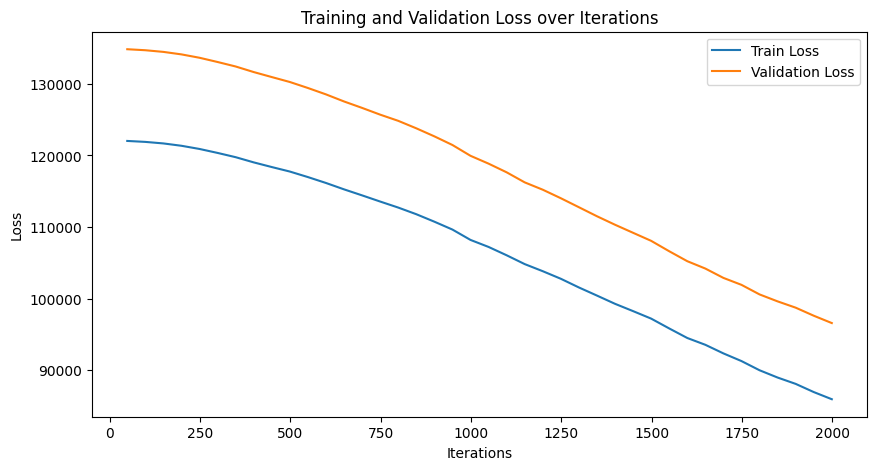

In [12]:
train_model(model, train_on_hot, val_on_hot, 0.01)